<a href="https://colab.research.google.com/github/chiyeon01/Hands_On_Machine_Learning/blob/main/5%EC%9E%A5.%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0/2.%20%EB%B9%84%EC%84%A0%ED%98%95%20SVM%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비선형 SVM 분류
비선형 데이터셋을 다루는 한 가지 방법은 다항 특성을 더 추가하는 것.

In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)

In [4]:
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [8]:
# pipeline 없이 구현하면 다음과 같음.

X_new = PolynomialFeatures(degree=3).fit_transform(X)
X_new = StandardScaler().fit_transform(X_new)
svm_clf = LinearSVC(C=10, max_iter=10000, random_state=42)
svm_clf = svm_clf.fit(X_new, y)

### SVM 시각화

In [19]:
pred = polynomial_svm_clf.predict(X)

In [20]:
pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

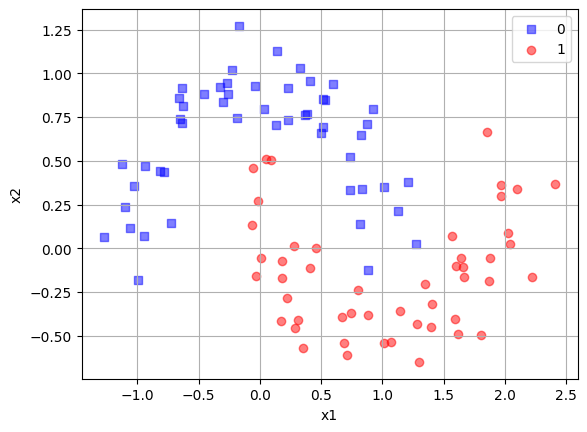

In [31]:
import matplotlib.pyplot as plt

plt.scatter(x=X[pred==0, 0], y=X[pred==0, 1], c='b', alpha=0.5, marker='s', label='0')
plt.scatter(x=X[pred==1, 0], y=X[pred==1, 1], c='r', alpha=0.5, marker='o', label='1')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# 커널 트릭
다항 특성을 추가하는 것이 일반적인 방법이지만, 높은 차수의 다항식은 모델을 느리게 만듬.<br/>
SVM은 '커널트릭'이라는 수학적 기교를 부려 높은 차수의 다항식 feature를 얻는 것과 비슷한 효과를 냄.

### 다항식 커널

In [37]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=3, coef0=1, C=5)
)

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

### 시각화

In [38]:
# 시각화 함수 생성
def show_svm(model, X):
    pred = model.predict(X)
    plt.scatter(x=X[pred==0, 0], y=X[pred==0, 1], c='b', alpha=0.5, marker='s', label='0')
    plt.scatter(x=X[pred==1, 0], y=X[pred==1, 1], c='r', alpha=0.5, marker='o', label='1')
    plt.grid(True)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

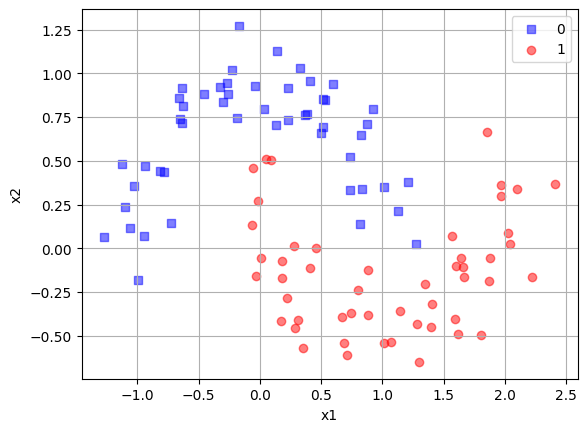

In [39]:
show_svm(poly_kernel_svm_clf, X)